In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns    

Dataset = pd.read_excel("./DE47DF00.xlsx",'Orders')
print(Dataset.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


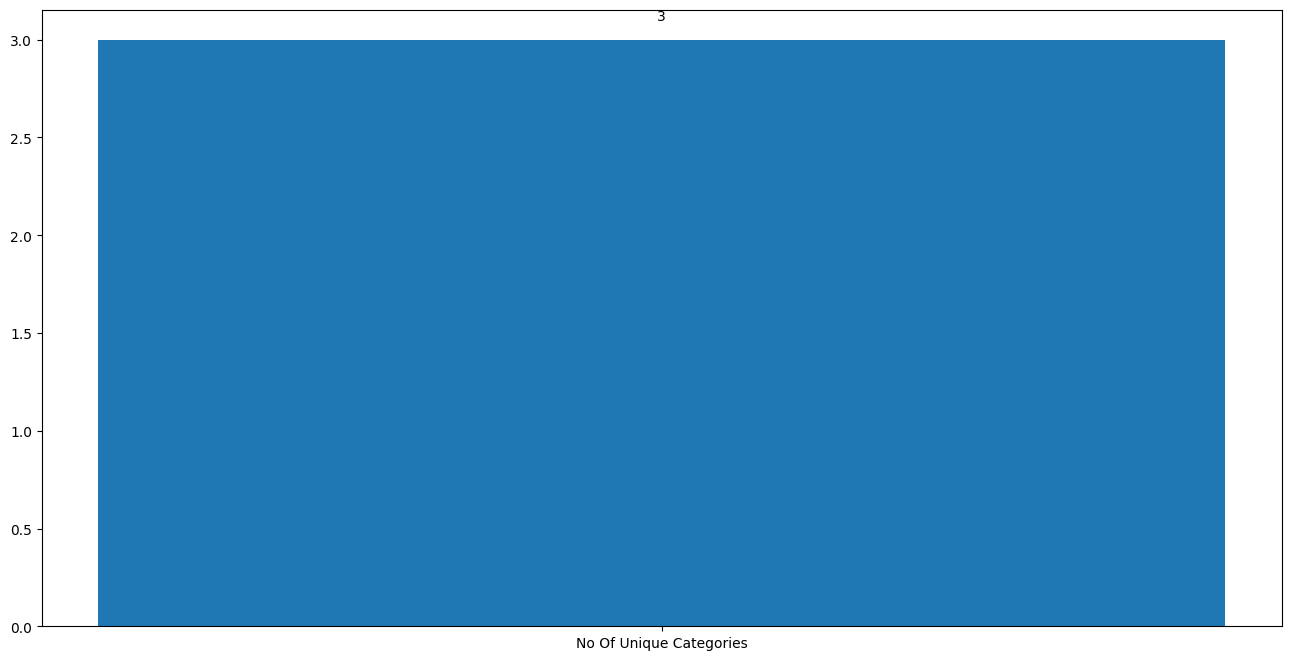

In [9]:
# Question 1 :-  product categories available to shop for customers

Unique_Categories = list(set(Dataset["Category"]))
plt.figure(figsize=(16, 8))

plt.bar(
    x=["No Of Unique Categories"], height=[len(Unique_Categories)], width=0.5
)

for i, v in enumerate([len(Unique_Categories)]):
    plt.text(i, v + 0.1, str(v), ha="center")

plt.show()

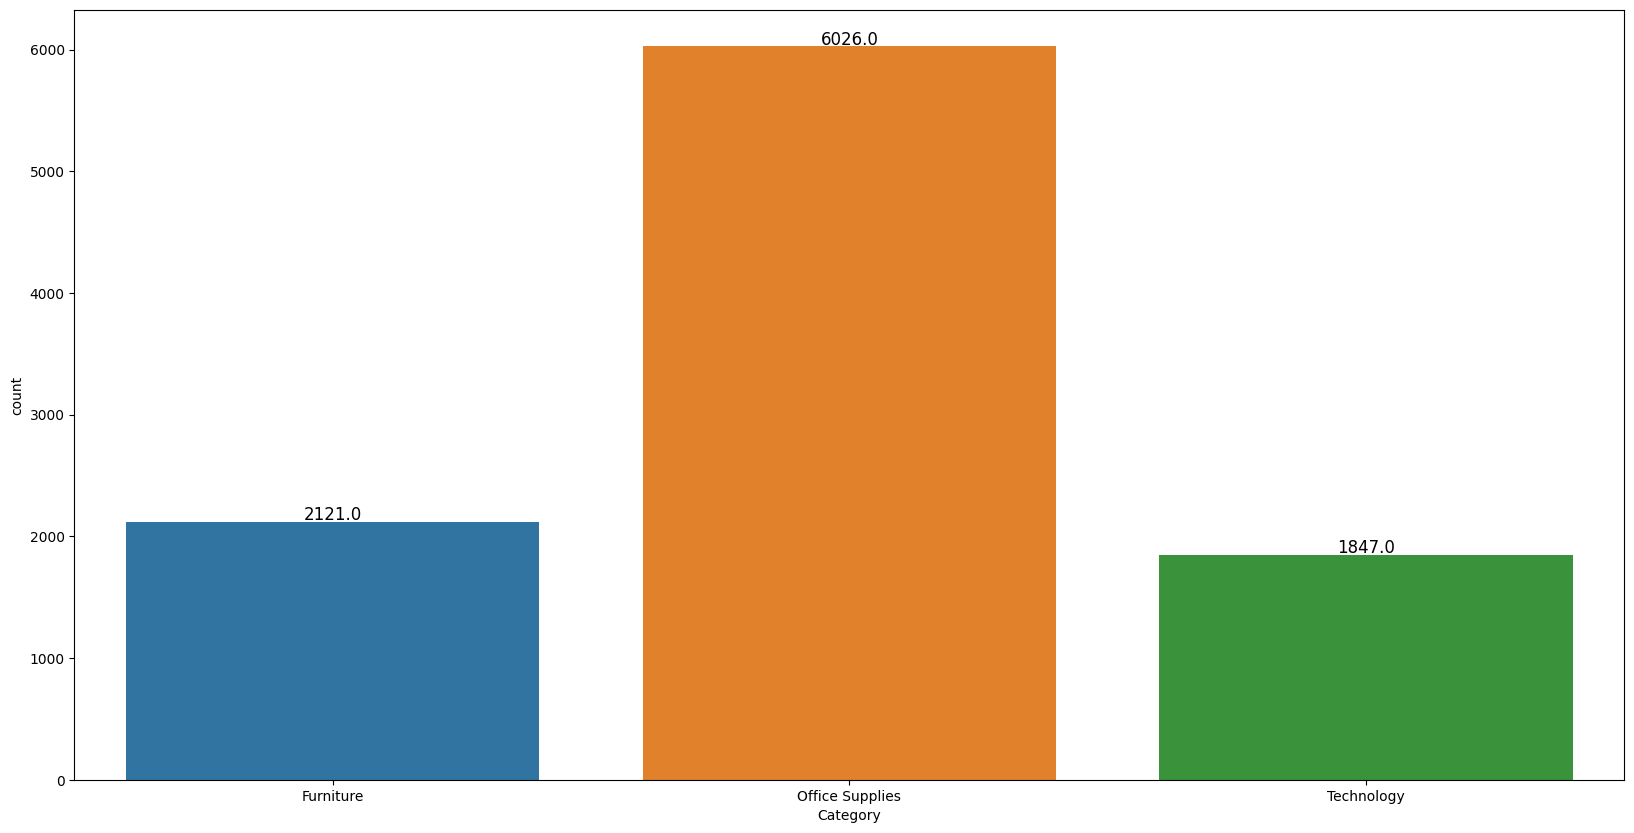

In [10]:
# Question - 2 :- number of products in each category

plt.figure(figsize=(20, 10))
ax = sns.countplot(x=Dataset["Category"], hue=Dataset["Category"])
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


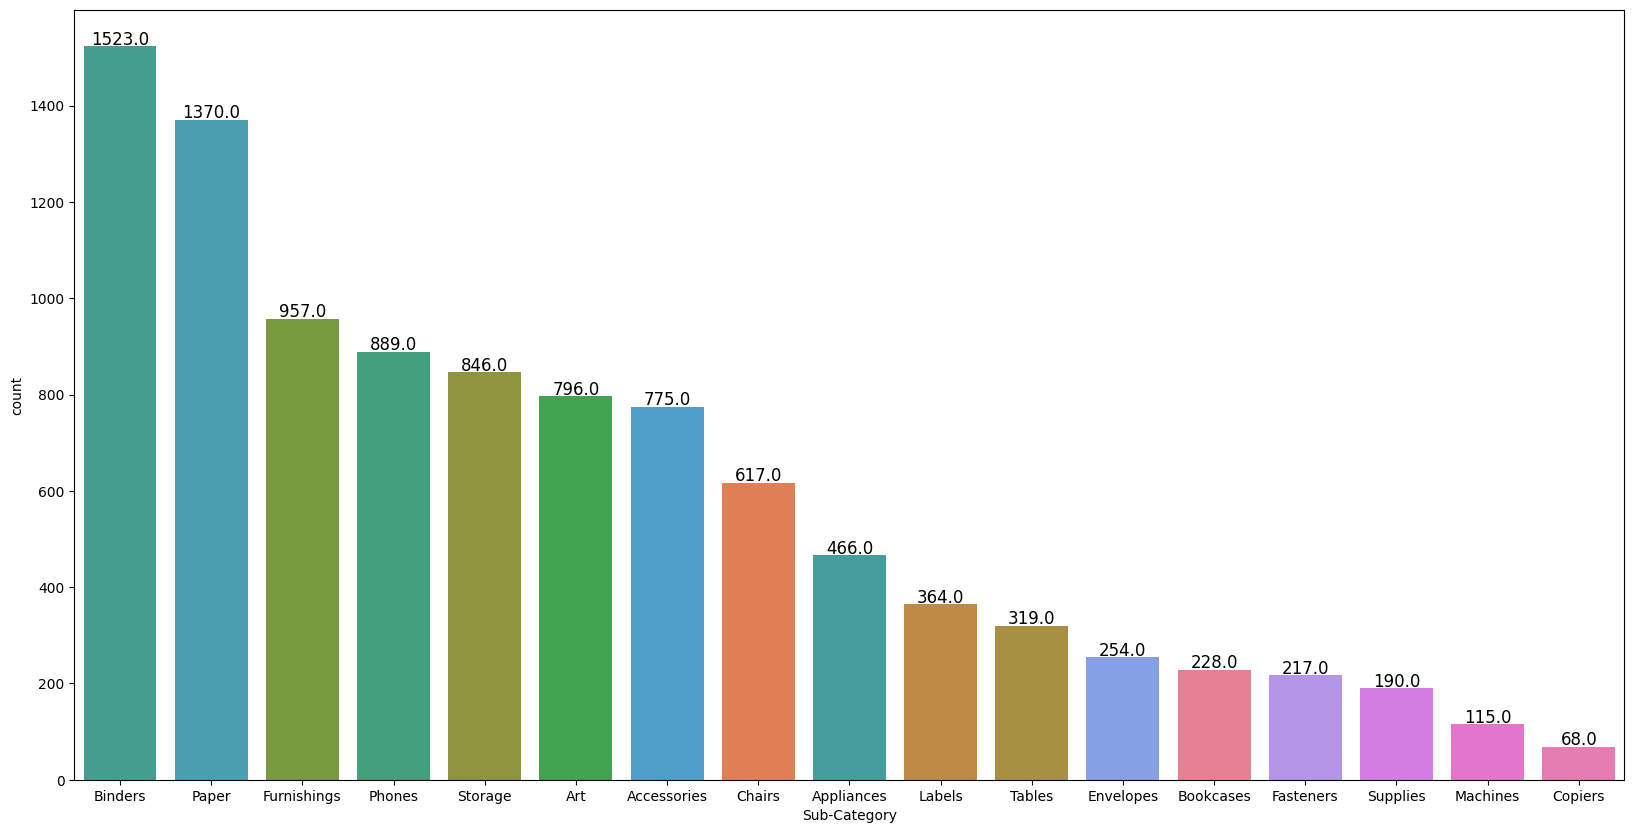

In [6]:
# Question - 3 :- number of products in each sub-category

Sub_categgory_wise_product_distribuition = Dataset["Sub-Category"].value_counts()
print(Sub_categgory_wise_product_distribuition)

plt.figure(figsize=(20, 10))
ax = sns.countplot(x=Dataset["Sub-Category"], hue=Dataset["Sub-Category"] , order=Dataset['Sub-Category'].value_counts(ascending=False).index)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=12,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

In [7]:
# Question - 4 :- Distribution of sub-categories wrt to category

Distribution_of_sub_categgory_wrt_Category = Dataset.groupby('Category')['Sub-Category'].unique() 
print(Distribution_of_sub_categgory_wrt_Category)

Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object


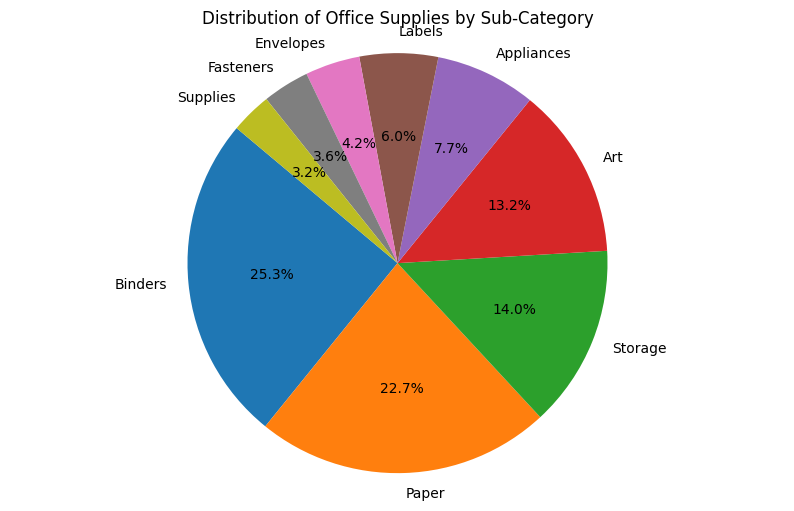

In [3]:
# Question - 5 :- Percentage distribution of varieties of Office Supplies

Office_Supplies_Distribution = (
    Dataset[Dataset["Category"] == "Office Supplies"]["Sub-Category"]
    .value_counts()
    .rename("Counts")
)
total_office_supplies = Office_Supplies_Distribution.sum()
Office_Supplies_Distribution_with_percentage = (
    Office_Supplies_Distribution / total_office_supplies
) * 100
Office_Supplies_Distribution_with_percentage = (
    Office_Supplies_Distribution_with_percentage.rename("Percentage")
)
Distribution_of_office_Supplies = pd.concat(
    [Office_Supplies_Distribution, Office_Supplies_Distribution_with_percentage], axis=1
)

plt.figure(figsize=(10, 6))
plt.pie(
    Distribution_of_office_Supplies["Counts"],
    labels=Distribution_of_office_Supplies.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Office Supplies by Sub-Category")
plt.axis("equal") 
plt.show()

              Counts  Percentage
Sub-Category                    
Phones           889   48.132106
Accessories      775   41.959935
Machines         115    6.226313
Copiers           68    3.681646


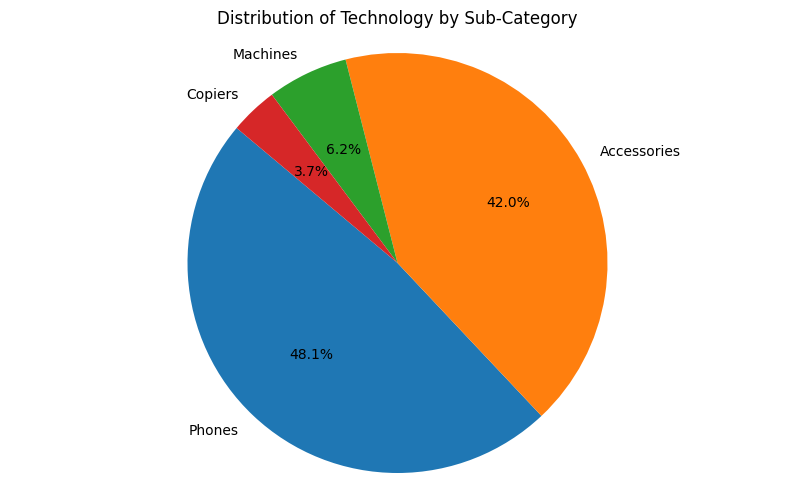

In [4]:
# Question - 6 :- Percentage distribution of varieties of Technology

# Percentage distribution of varieties of Technology
Technology_Distribution = (
    Dataset[Dataset["Category"] == "Technology"]["Sub-Category"]
    .value_counts()
    .rename("Counts")
)
total_technology = Technology_Distribution.sum()
Technology_Distribution_with_percentage = (
    Technology_Distribution / total_technology
) * 100
Technology_Distribution_with_percentage = (
    Technology_Distribution_with_percentage.rename("Percentage")
)
Distribution_of_Technology = pd.concat(
    [Technology_Distribution, Technology_Distribution_with_percentage], axis=1
)

print(Distribution_of_Technology)

plt.figure(figsize=(10, 6))
plt.pie(
    Distribution_of_Technology["Counts"],
    labels=Distribution_of_Technology.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Technology by Sub-Category")
plt.axis("equal")
plt.show()

              Counts  Percentage
Sub-Category                    
Furnishings      957   45.120226
Chairs           617   29.090052
Tables           319   15.040075
Bookcases        228   10.749646


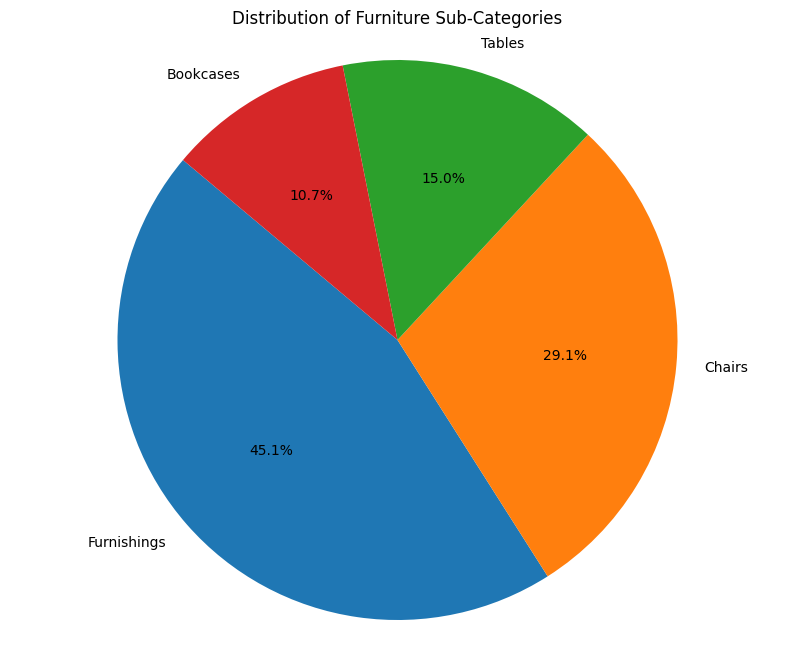

In [5]:
# Question - 7 :- Percentage distribution of varieties of Furniture

Furniture_Distribuition = (Dataset[Dataset["Category"] == "Furniture"]["Sub-Category"].value_counts().rename("Counts"))
total_furniture = Furniture_Distribuition.sum()
Furniture_Distribution_with_percentage = (Furniture_Distribuition / total_furniture) * 100
Furniture_Distribution_with_percentage = Furniture_Distribution_with_percentage.rename("Percentage")
Distribution_of_Furniture = pd.concat([Furniture_Distribuition, Furniture_Distribution_with_percentage], axis=1)
print(Distribution_of_Furniture)
plt.figure(figsize=(10, 8))
plt.pie(
    Distribution_of_Furniture["Counts"],
    labels=Distribution_of_Furniture.index,
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Distribution of Furniture Sub-Categories")
plt.axis("equal")  
plt.show()

                  Profit        Sales
Sub-Category                         
Accessories   41936.6357  167380.3180
Appliances    18138.0054  107532.1610
Art            6527.7870   27118.7920
Binders       30221.7633  203412.7330
Bookcases     -3472.5560  114879.9963
Chairs        26590.1663  328449.1030
Copiers       55617.8249  149528.0300
Envelopes      6964.1767   16476.4020
Fasteners       949.5182    3024.2800
Furnishings   13059.1436   91705.1640
Labels         5546.2540   12486.3120
Machines       3384.7569  189238.6310
Paper         34053.5693   78479.2060
Phones        44515.7306  330007.0540
Storage       21278.8264  223843.6080
Supplies      -1189.0995   46673.5380
Tables       -17725.4811  206965.5320


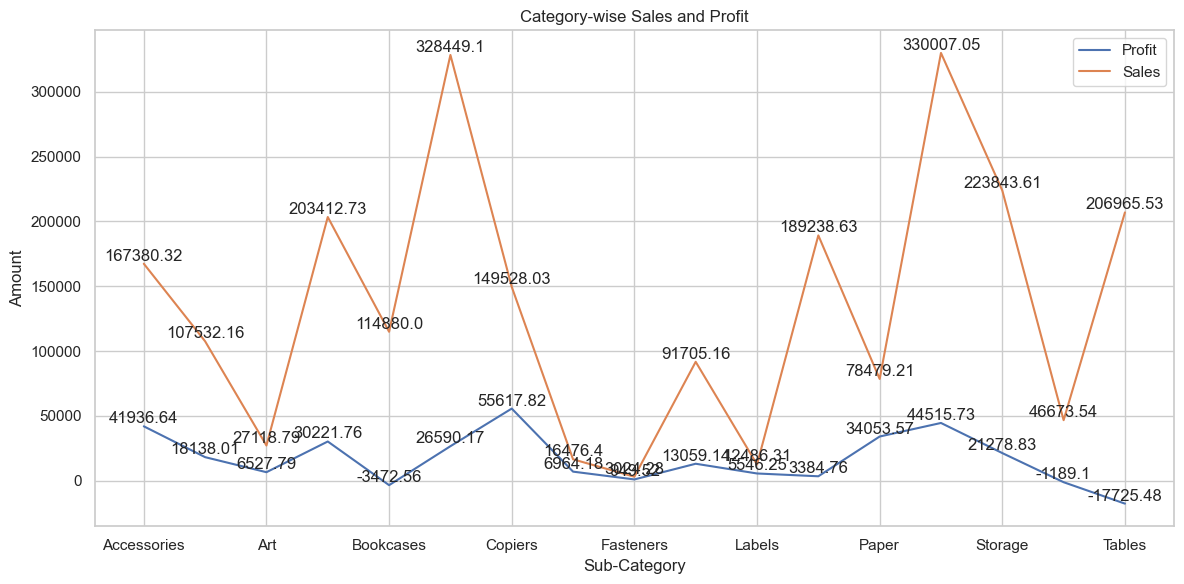

In [18]:
# Question - 8 :- Profit and sales for each sub-category

Category_wise_Sales_and_profit = Dataset.groupby("Sub-Category")[["Profit", "Sales"]].sum()
print(Category_wise_Sales_and_profit)
ax = Category_wise_Sales_and_profit.plot(kind="line", figsize=(12, 6))
plt.title("Category-wise Sales and Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Amount")
plt.grid(True)
plt.legend(loc="upper right")

for column in Category_wise_Sales_and_profit.columns:
    for index, value in enumerate(Category_wise_Sales_and_profit[column]):
        ax.text(index, value, str(round(value, 2)), ha="center", va="bottom")

plt.tight_layout()
plt.show()

There are 1850 Unique Products :-
['Bush Somerset Collection Bookcase'
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'
 'Self-Adhesive Address Labels for Typewriters by Universal' ...
 'Eureka Hand Vacuum, Bagless' 'LG G2'
 'Eldon Jumbo ProFile Portable File Boxes Graphite/Black']


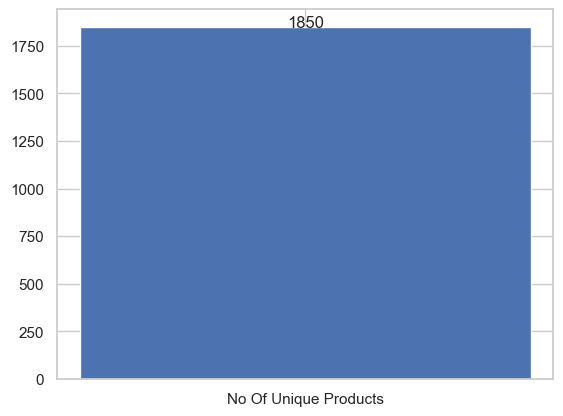

In [55]:
# Question - 9 :- Total number of unique products ordered in store

Unique_Products = Dataset['Product Name'].unique()
No_of_Unique_Products = Dataset['Product Name'].nunique()
print(f"There are {No_of_Unique_Products} Unique Products :-\n{Unique_Products}")
plt.bar(
    x=["No Of Unique Products"], height=[len(Unique_Products)], width=0.5
)

for i, v in enumerate([len(Unique_Products)]):
    plt.text(i, v + 0.5, str(v), ha="center")

plt.show()

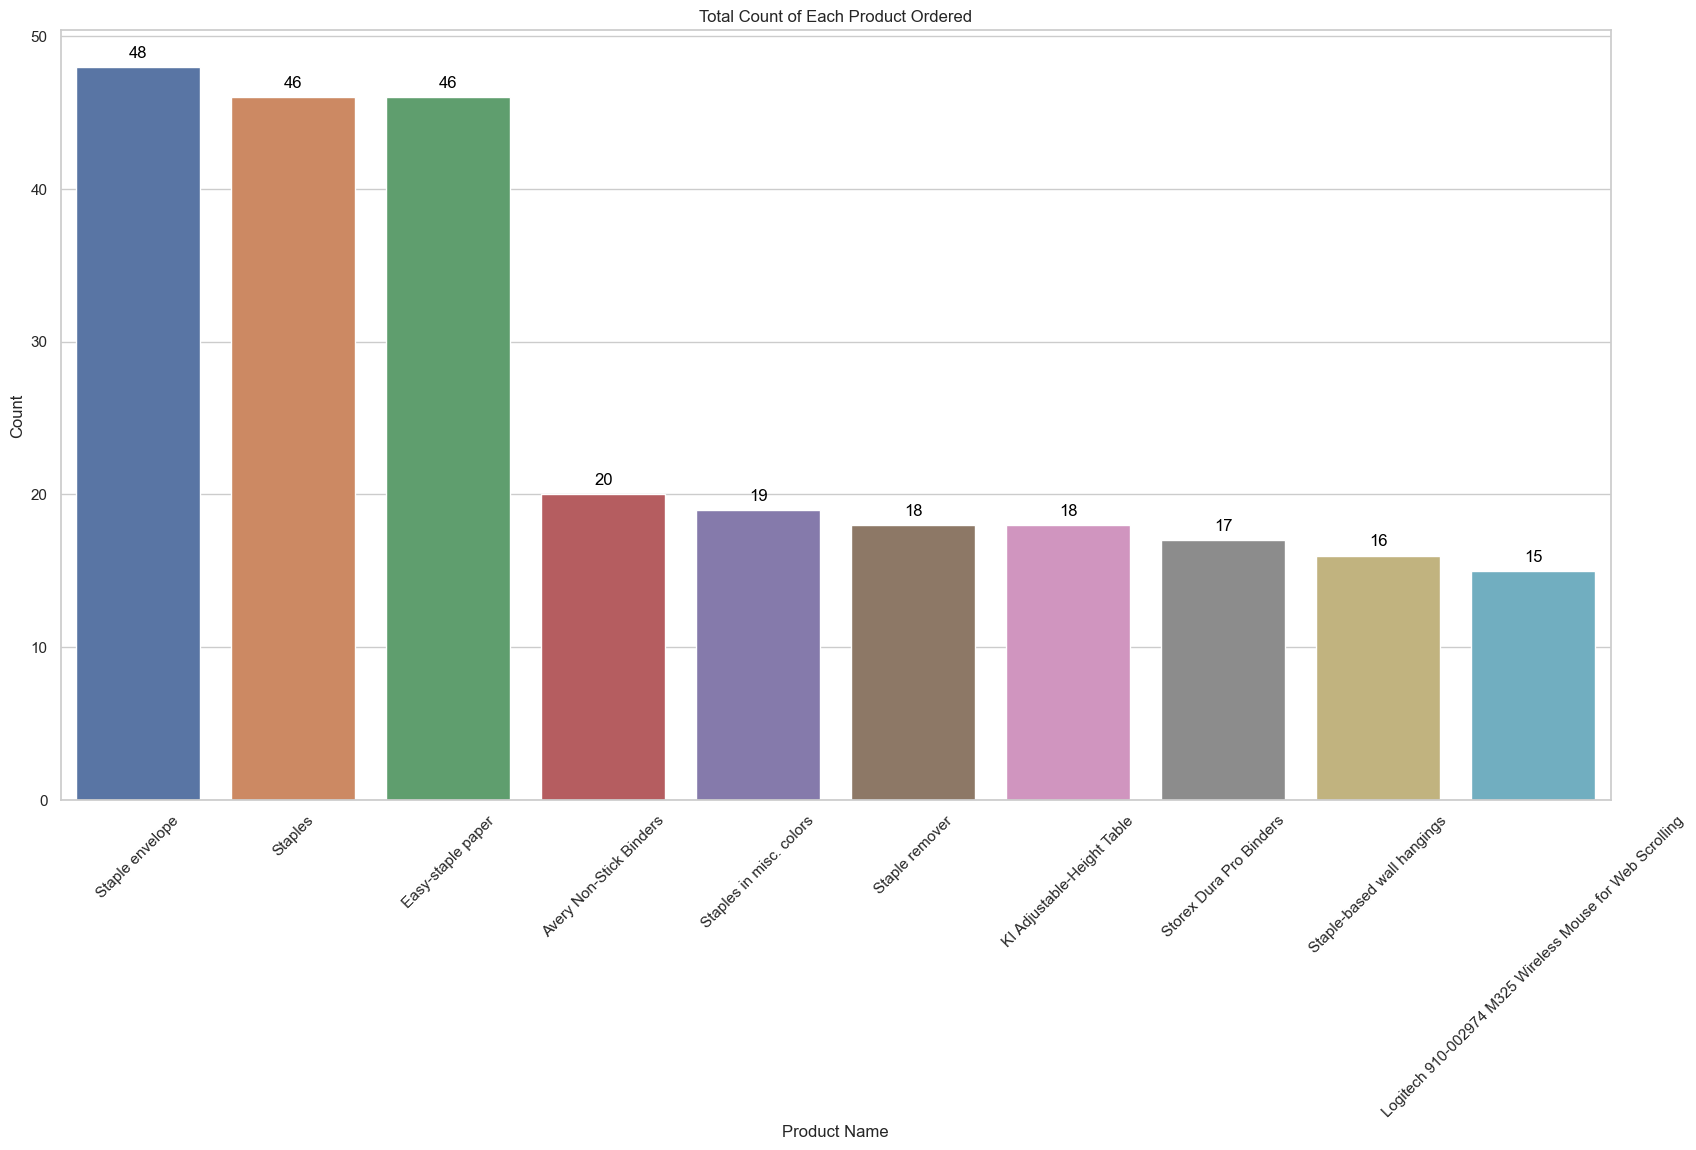

In [32]:
# Question - 10 :- Total count of each product ordered in store

Count_of_Each_Product = Dataset['Product Name'].value_counts()
Data = Count_of_Each_Product[:10]
Data_df = pd.DataFrame({"Product Name": Data.index, "Count": Data.values})

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=Data_df, x="Product Name", y="Count", hue="Product Name")
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

plt.xticks(rotation=45)
plt.xlabel("Product Name")
plt.ylabel("Count")
plt.title("Total Count of Each Product Ordered")
plt.show()

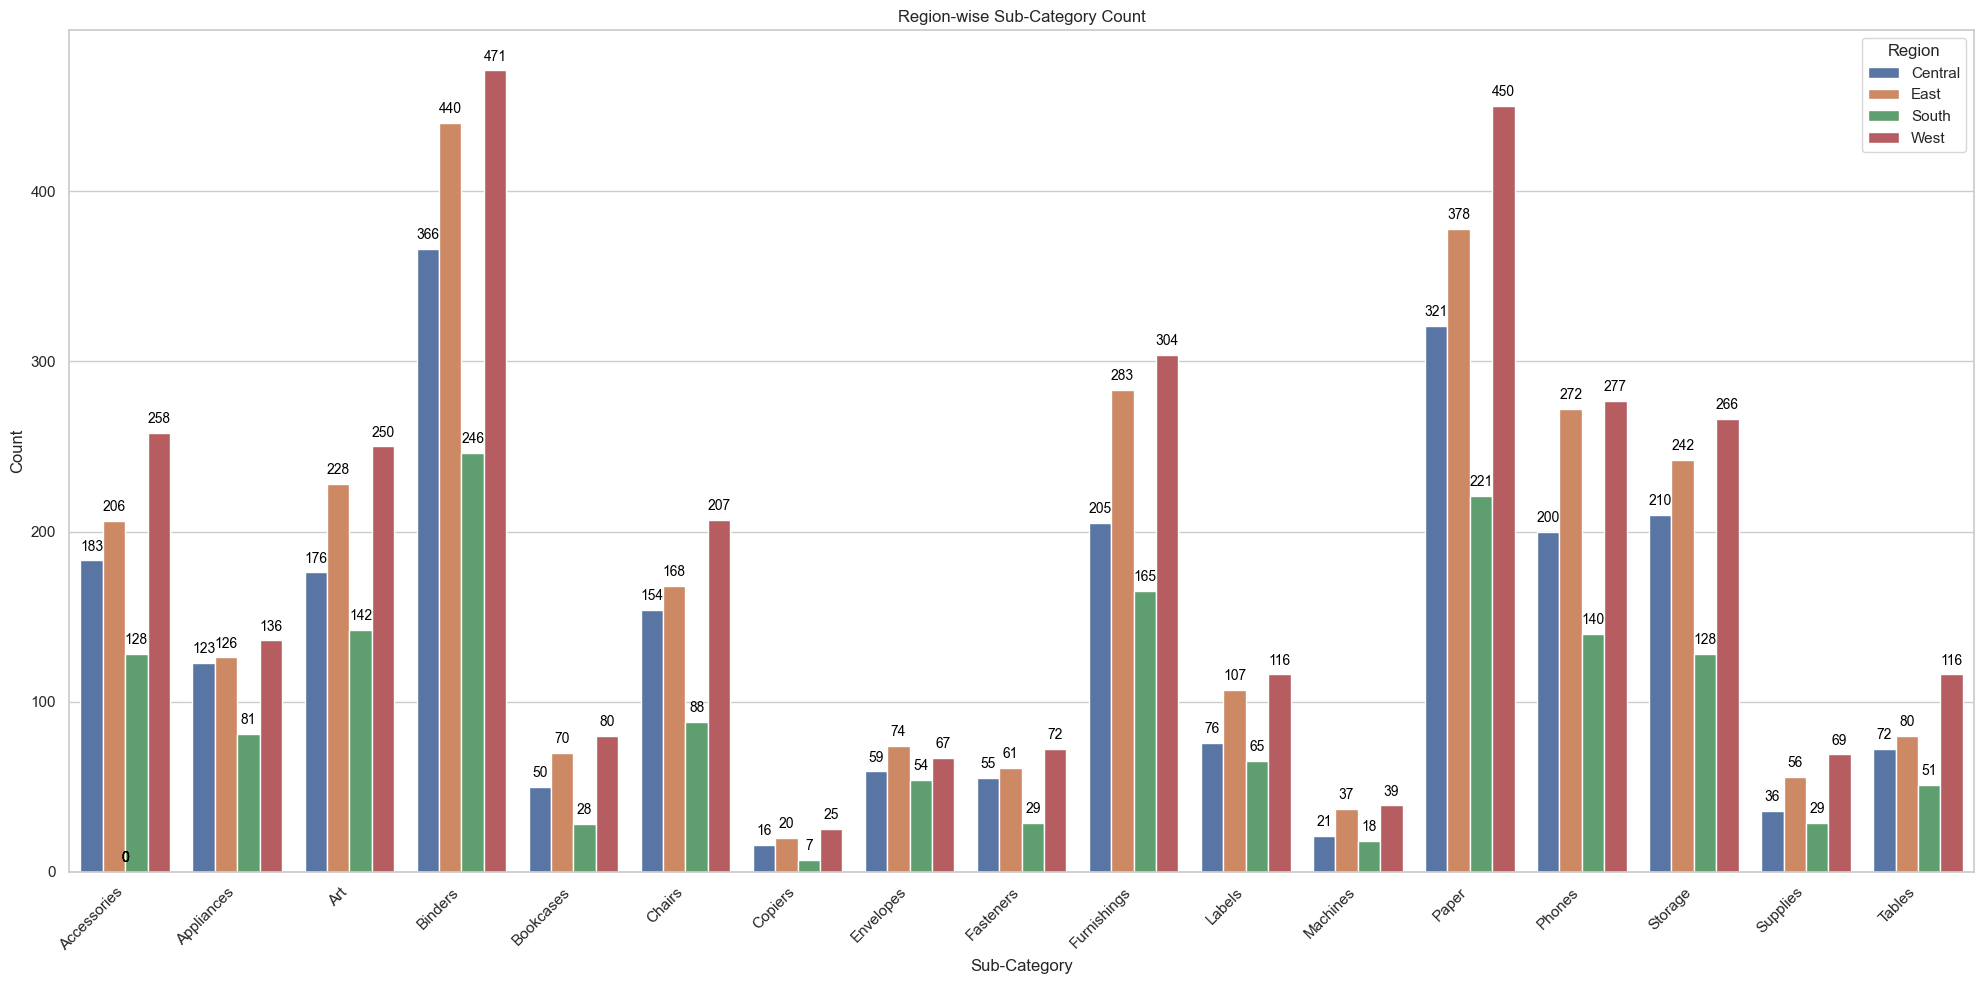

In [54]:
# Question - 11 :- total count of subcategory region wise

Region_wise_sub_category_count = Dataset.groupby(["Region", "Sub-Category"]).size().reset_index(name="Count")
plt.figure(figsize=(20, 10))
ax = sns.barplot(
    data=Region_wise_sub_category_count, x="Sub-Category", y="Count", hue="Region"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Sub-Category")
plt.ylabel("Count")
plt.title("Region-wise Sub-Category Count")
plt.legend(title="Region", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


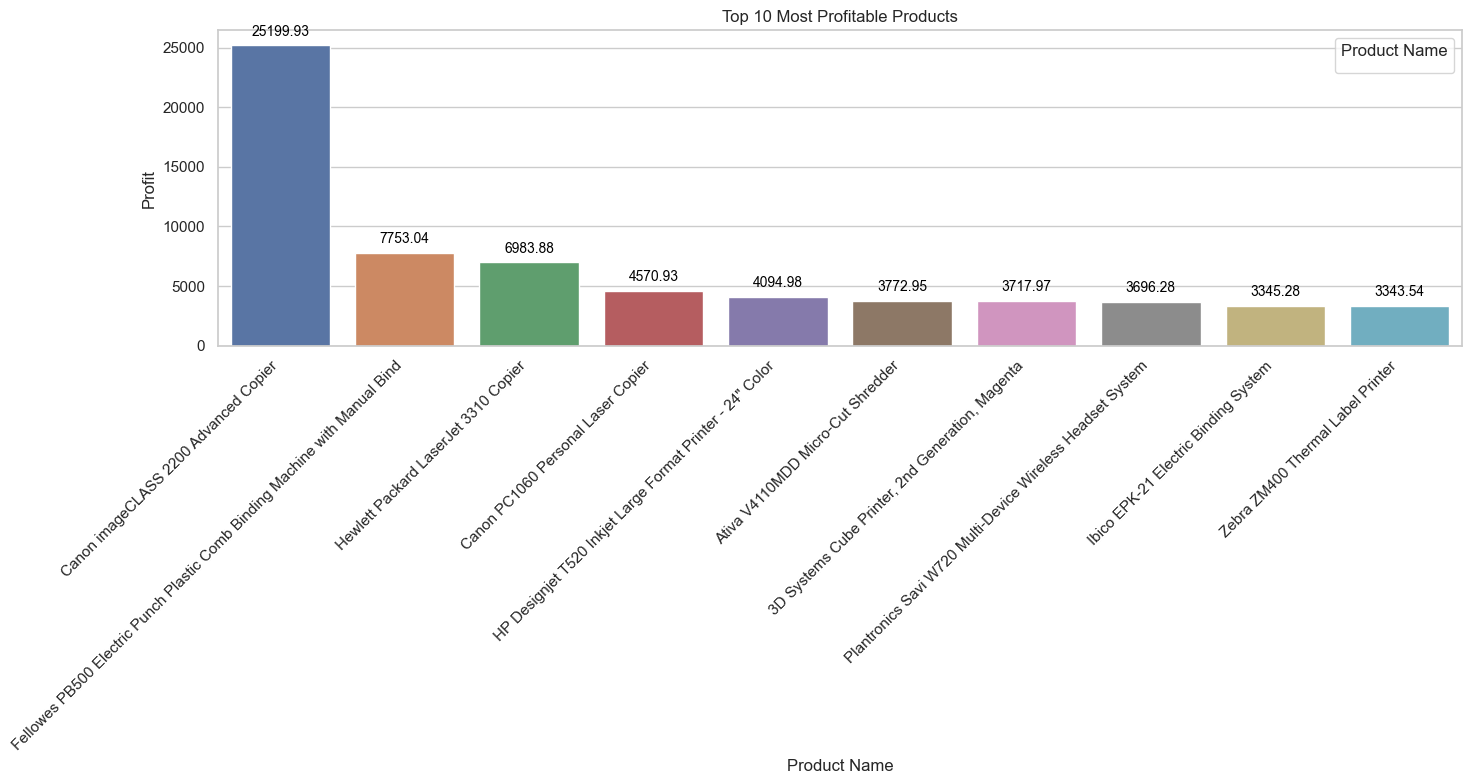

In [44]:
# Question - 12 :- Which product has the highest profit

Max_Profitable_Product = (
    Dataset.groupby("Product Name")["Profit"].sum().sort_values(ascending=False)
)[:10]
Max_Profitable_Product_df = pd.DataFrame(
    {"Product Name": Max_Profitable_Product.index, "Profit": Max_Profitable_Product.values}
)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=Max_Profitable_Product_df, x="Product Name", y="Profit", hue="Product Name"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.title("Top 10 Most Profitable Products")
plt.legend(title="Product Name", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


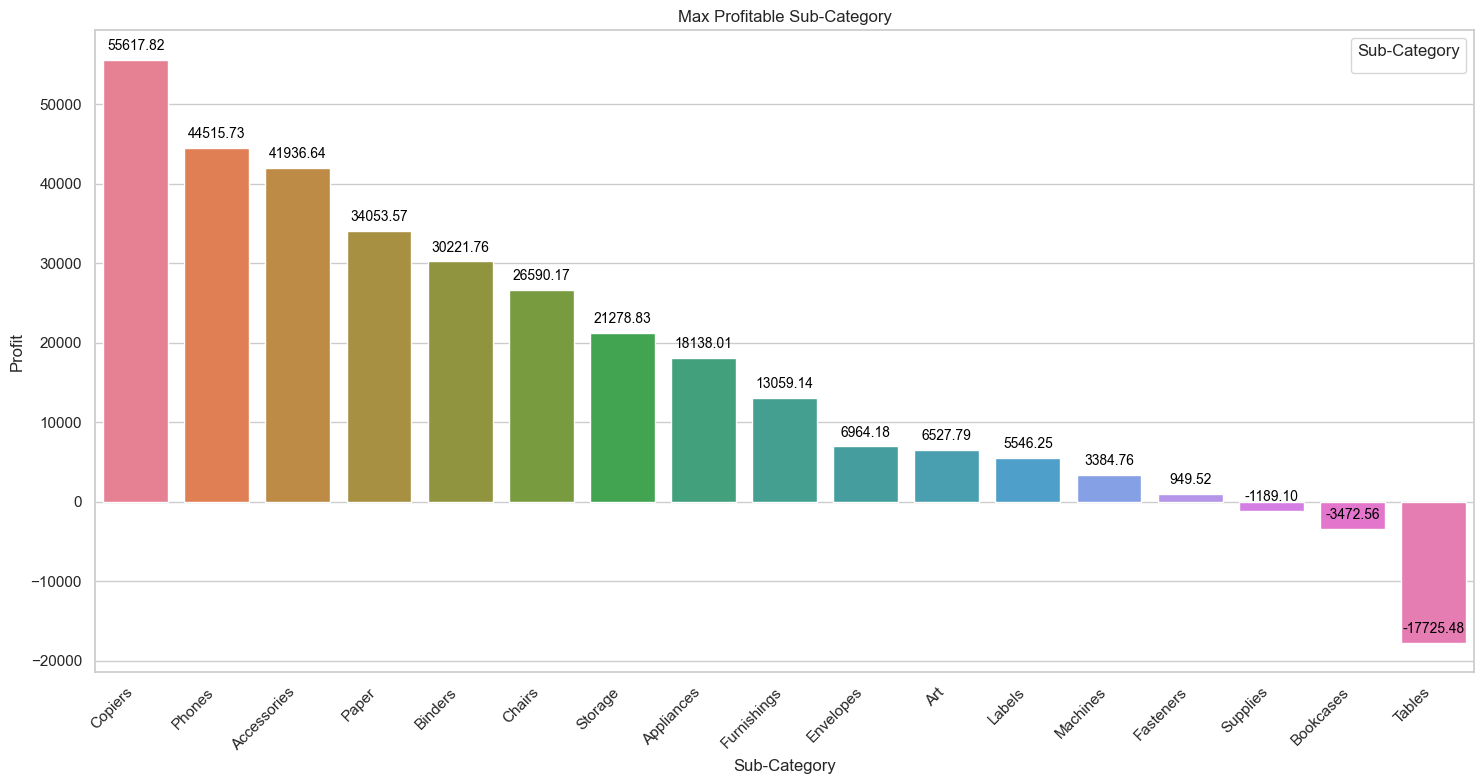

In [48]:
# Question - 13 :- Which sub-category has the highest profit

Max_Profitable_Sub_Category = Dataset.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)
Max_Profitable_Sub_Category_df = pd.DataFrame(
    {
        "Sub-Category": Max_Profitable_Sub_Category.index,
        "Profit": Max_Profitable_Sub_Category.values,
    }
)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=Max_Profitable_Sub_Category_df,
    x="Sub-Category",
    y="Profit",
    hue="Sub-Category",
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Max Profitable Sub-Category")
plt.legend(title="Sub-Category", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


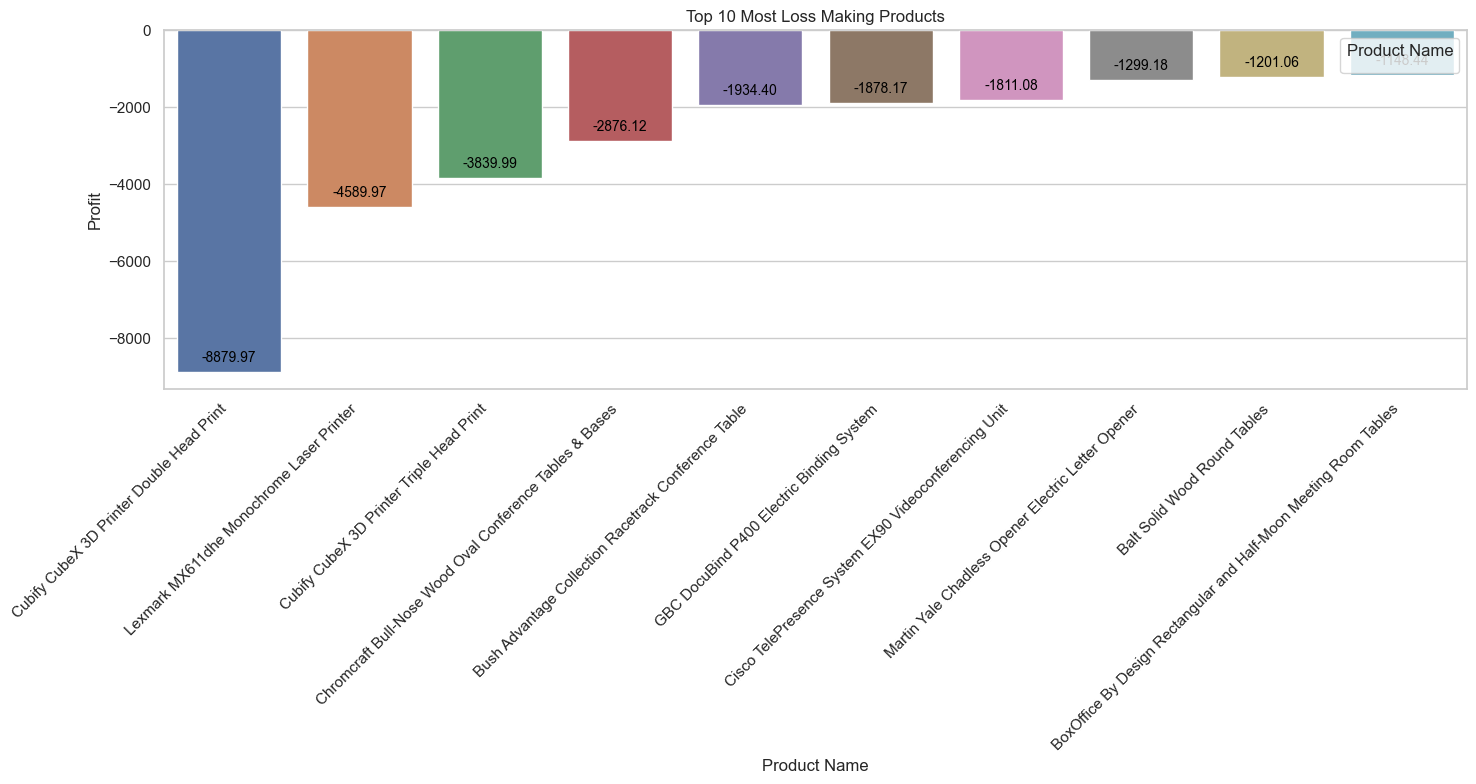

In [49]:
# Question - 14 :- Which product has the highest loss

Max_Loss_Product = Dataset.groupby("Product Name")["Profit"].sum().sort_values(ascending=True)[:10]
Max_Loss_Product_df = pd.DataFrame(
    {
        "Product Name": Max_Loss_Product.index,
        "Profit": Max_Loss_Product.values,
    }
)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=Max_Loss_Product_df, x="Product Name", y="Profit", hue="Product Name"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right") 
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.title("Top 10 Most Loss Making Products")
plt.legend(title="Product Name", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


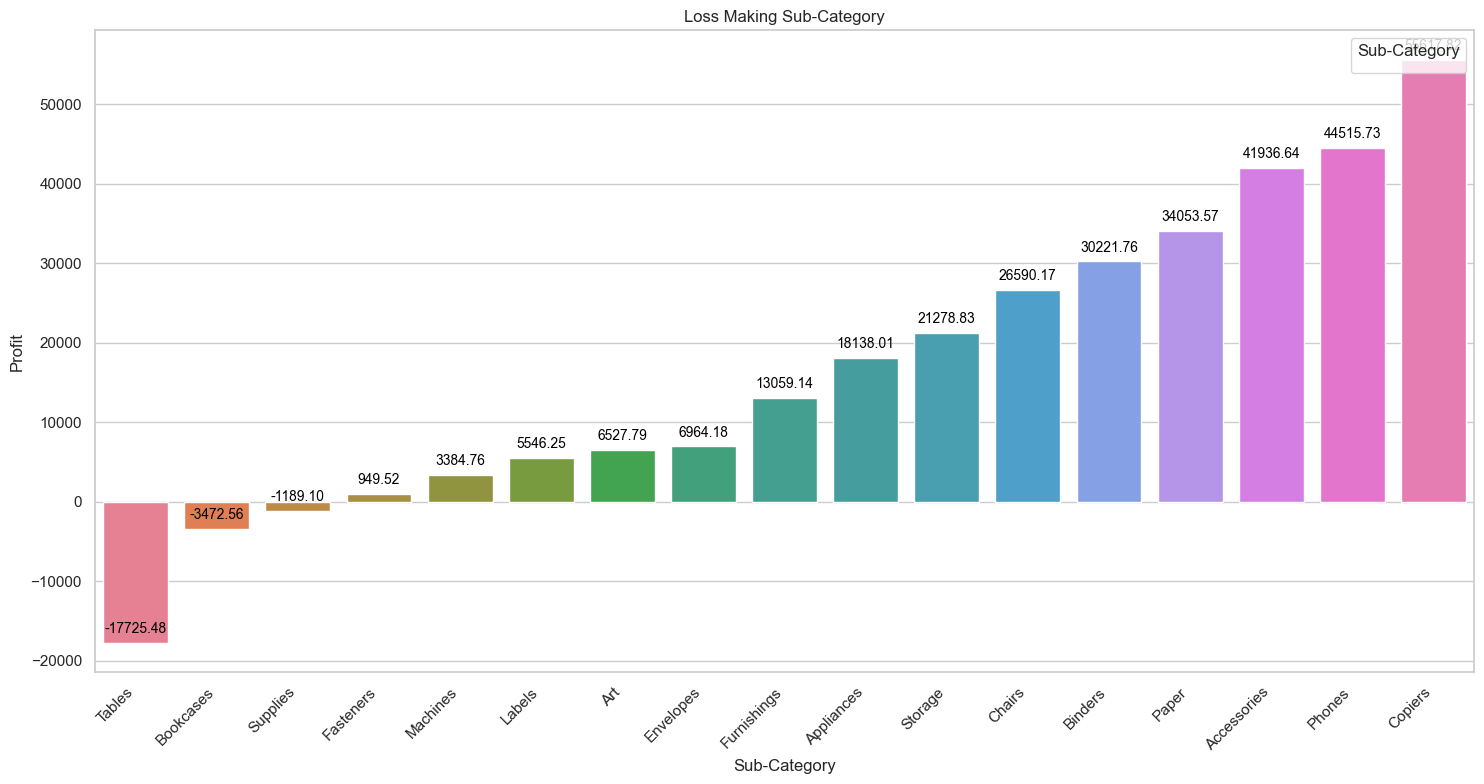

In [51]:
# Question - 15 :- Which sub-category has the highest loss

Max_Loss_Sub_Category = Dataset.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=True)
Max_Loss_Sub_Category_df = pd.DataFrame(
    {
        "Sub-Category": Max_Loss_Sub_Category.index,
        "Profit": Max_Loss_Sub_Category.values,
    }
)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=Max_Loss_Sub_Category_df,
    x="Sub-Category",
    y="Profit",
    hue="Sub-Category",
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.title("Loss Making Sub-Category")
plt.legend(title="Sub-Category", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


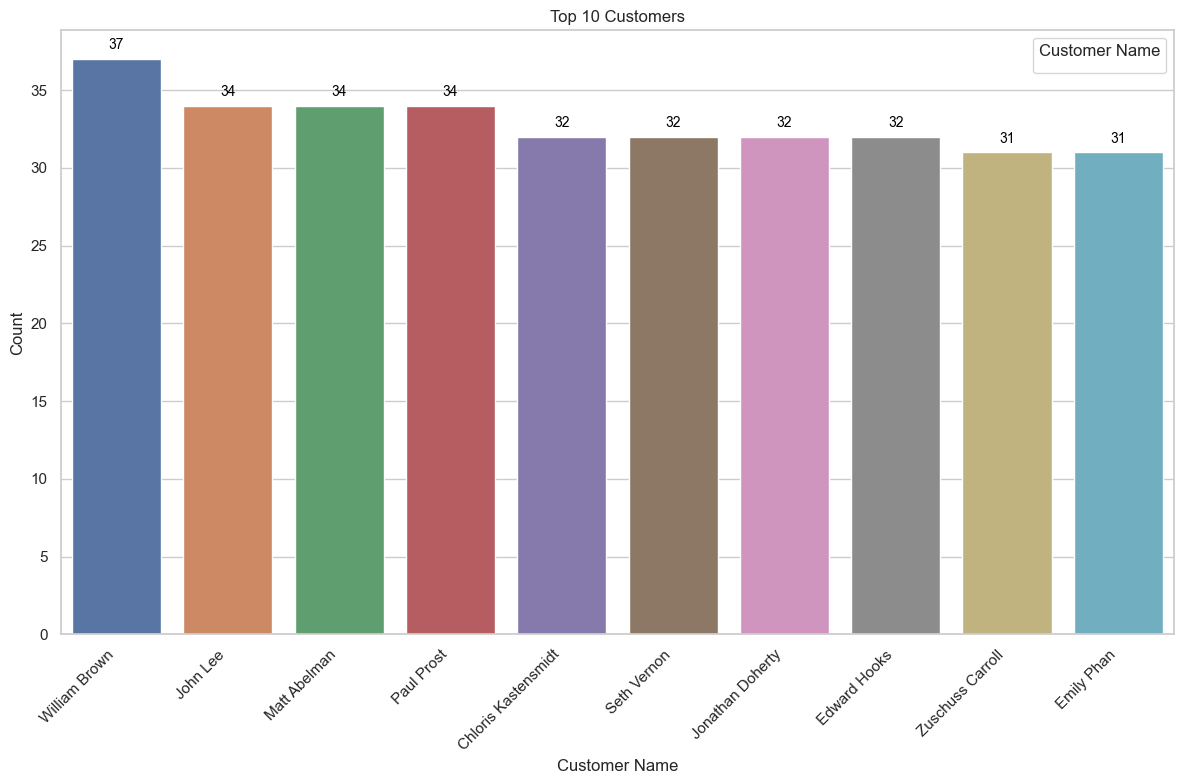

In [53]:
# Question - 16 :- Top 10 customers who order frequently

Top_10_Customers = Dataset['Customer Name'].value_counts()
Top_10_Customers_df = pd.DataFrame({
    "Customer Name": Top_10_Customers.index,
    "Count": Top_10_Customers.values
})[:10]
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=Top_10_Customers_df, x="Customer Name", y="Count", hue="Customer Name"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right") 
plt.xlabel("Customer Name")
plt.ylabel("Count")
plt.title("Top 10 Customers")
plt.legend(title="Customer Name", loc="upper right")
plt.tight_layout()
plt.show()

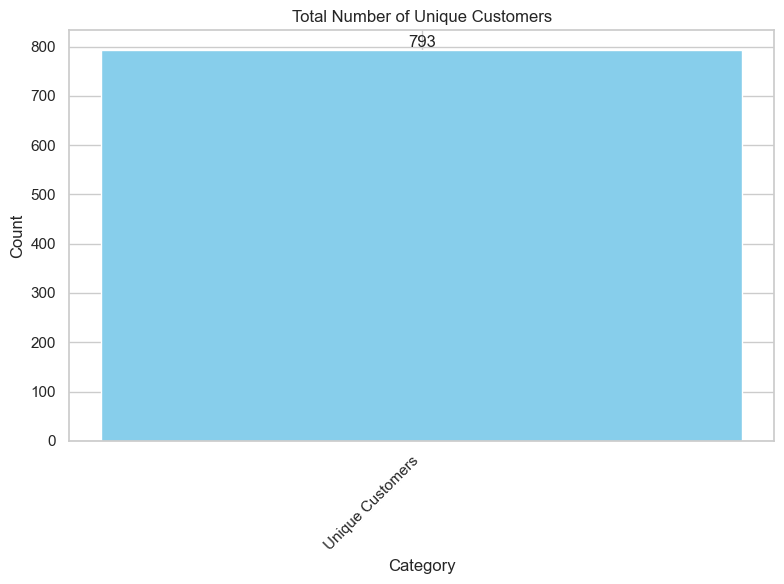

In [58]:
# Question - 17 :- Total Number of unique customers

unique_customers_count = Dataset["Customer Name"].nunique()
plt.figure(figsize=(8, 6))
bars = plt.bar(["Unique Customers"], [unique_customers_count], color="skyblue")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Total Number of Unique Customers")

for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        round(yval, 2),
        va="bottom",
        ha="center",
    )

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


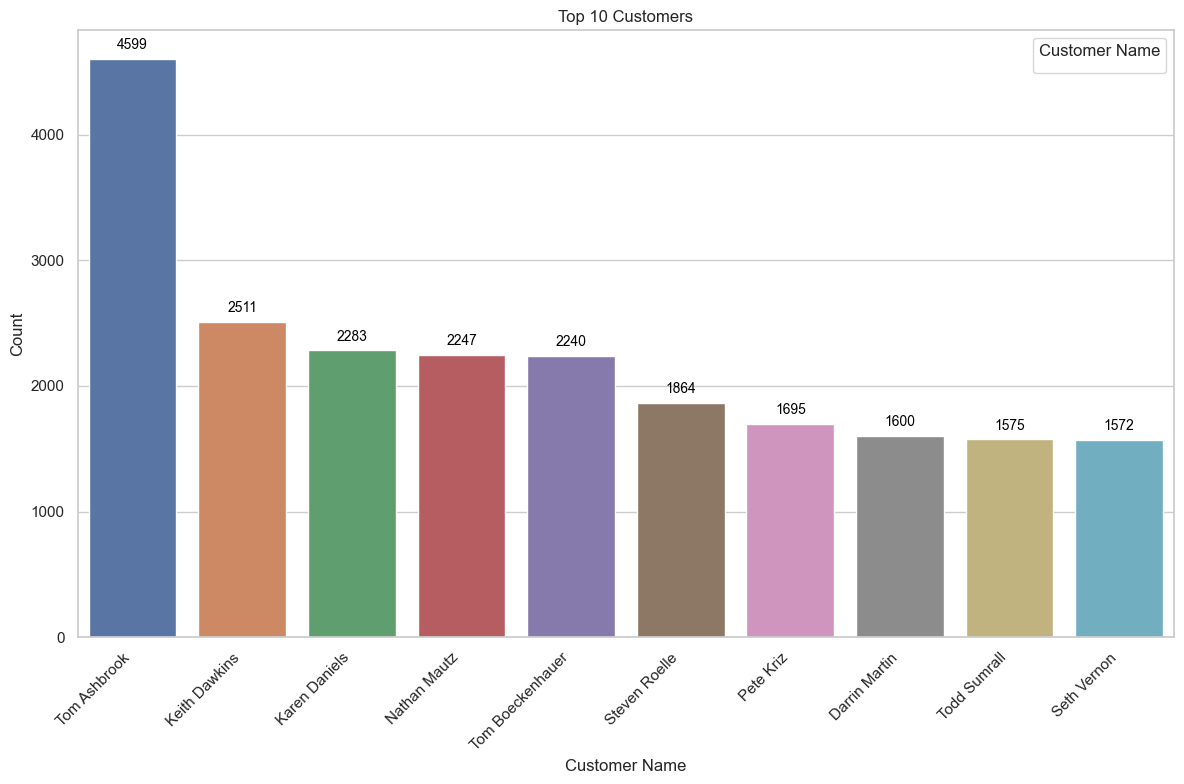

In [71]:
# Question - 18 :- Top-10 profitable customers in NewYork


New_York_Customers = Dataset[Dataset["State"] == "New York"]
Profitable_Customers = New_York_Customers.groupby("Customer Name")["Profit"].sum()
Top_10_Customers = pd.DataFrame(
    {"Customer Name": Profitable_Customers.index, "Profit": Profitable_Customers.values}
).sort_values(by="Profit", ascending=False)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=Top_10_Customers, x="Customer Name", y="Profit", hue="Customer Name"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")
plt.xlabel("Customer Name")
plt.ylabel("Count")
plt.title("Top 10 Customers")
plt.legend(title="Customer Name", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


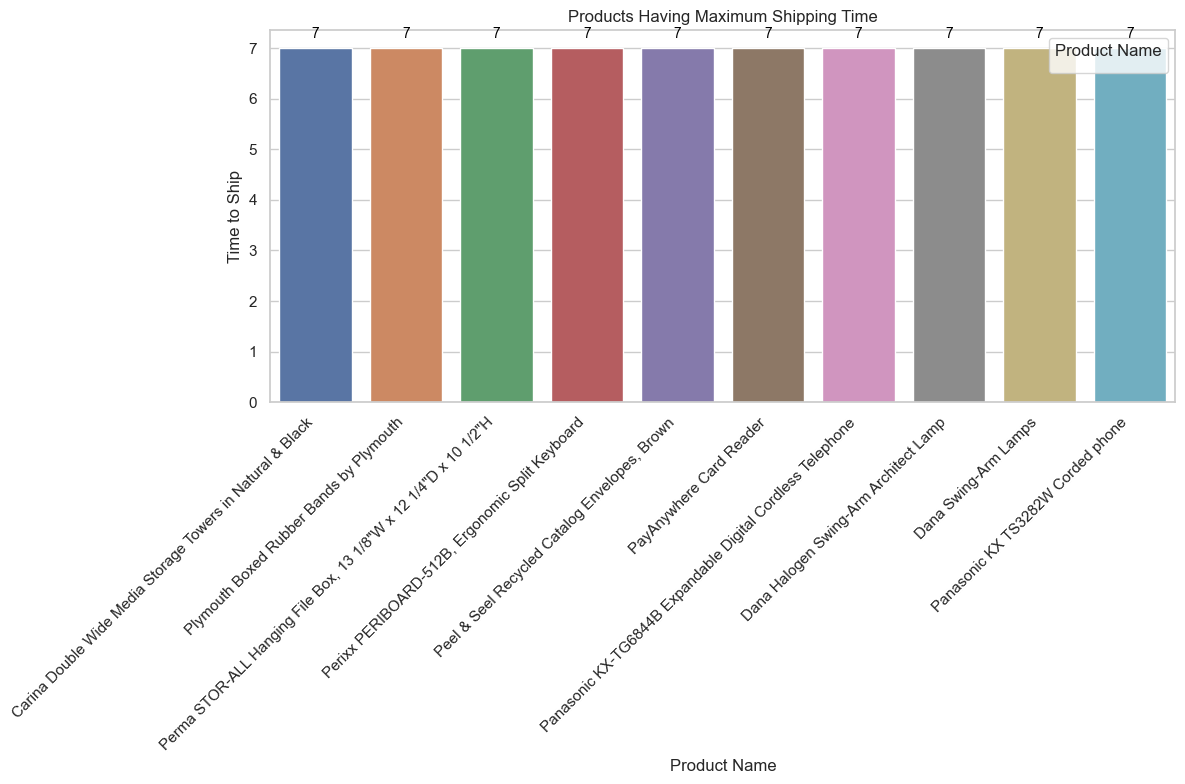

In [78]:
# Question - 19 :- Product having the maximum time taken to ship

Dataset['Time_to_Ship'] = (Dataset['Ship Date'] - Dataset['Order Date']).dt.days
Product_wies_Ship_Day = Dataset.groupby("Product Name")["Time_to_Ship"].max()
Product_wies_Ship_Day = pd.DataFrame(
    {
        "Product Name": Product_wies_Ship_Day.index,
        "Time to Ship": Product_wies_Ship_Day.values,
    }
).sort_values(by="Time to Ship", ascending=False)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=Product_wies_Ship_Day, x="Product Name", y="Time to Ship", hue="Product Name"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right")  
plt.xlabel("Product Name")
plt.ylabel("Time to Ship")
plt.title("Products Having Maximum Shipping Time")
plt.legend(title="Product Name", loc="upper right")
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


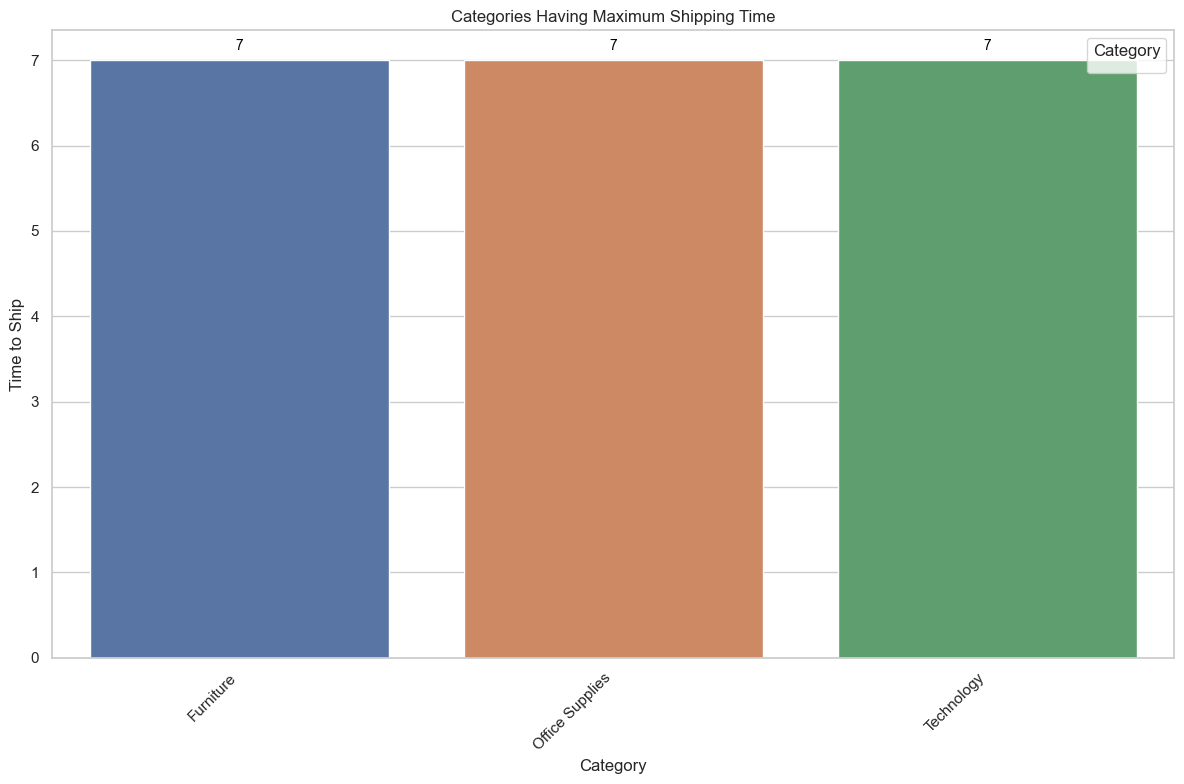

In [81]:
# Question - 20 :- Category having the maximum time taken to ship

Dataset['Time_to_Ship'] = (Dataset['Ship Date'] - Dataset['Order Date']).dt.days
Category_Ship_Wise_Groupping = Dataset.groupby('Category')['Time_to_Ship'].max()
Category_Ship_Wise_Groupping_df = pd.DataFrame(
    {
        "Category": Category_Ship_Wise_Groupping.index,
        "Time to Ship": Category_Ship_Wise_Groupping.values,
    }
).sort_values(by="Time to Ship", ascending=False)[:10]

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=Category_Ship_Wise_Groupping_df, x="Category", y="Time to Ship", hue="Category"
)

for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=10,
        color="black",
    )

plt.xticks(rotation=45, ha="right") 
plt.xlabel("Category")
plt.ylabel("Time to Ship")
plt.title("Categories Having Maximum Shipping Time")
plt.legend(title="Category", loc="upper right")
plt.tight_layout()
plt.show()

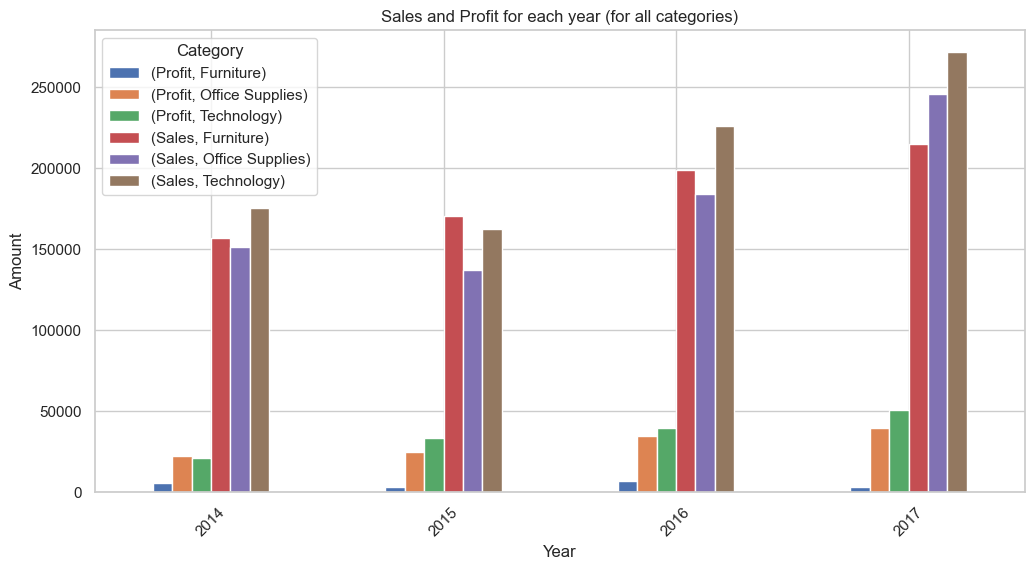

In [90]:
# Question - 21 :- Sales and Profit for each year (for all the categories)


Dataset['Year'] = Dataset['Order Date'].dt.year

Category_Ship_Wise_Groupping = Dataset.groupby('Category')['Time_to_Ship'].max()
Year_wise_profit_and_sales = Dataset.groupby(["Year", 'Category']).agg(
    {"Profit": "sum", "Sales": "sum"}
)
grouped_data = Dataset.groupby(['Year', 'Category'])[['Sales', 'Profit']].sum().reset_index()
pivot_data = grouped_data.pivot_table(index='Year', columns='Category', values=['Sales', 'Profit'])
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Sales and Profit for each year (for all categories)')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


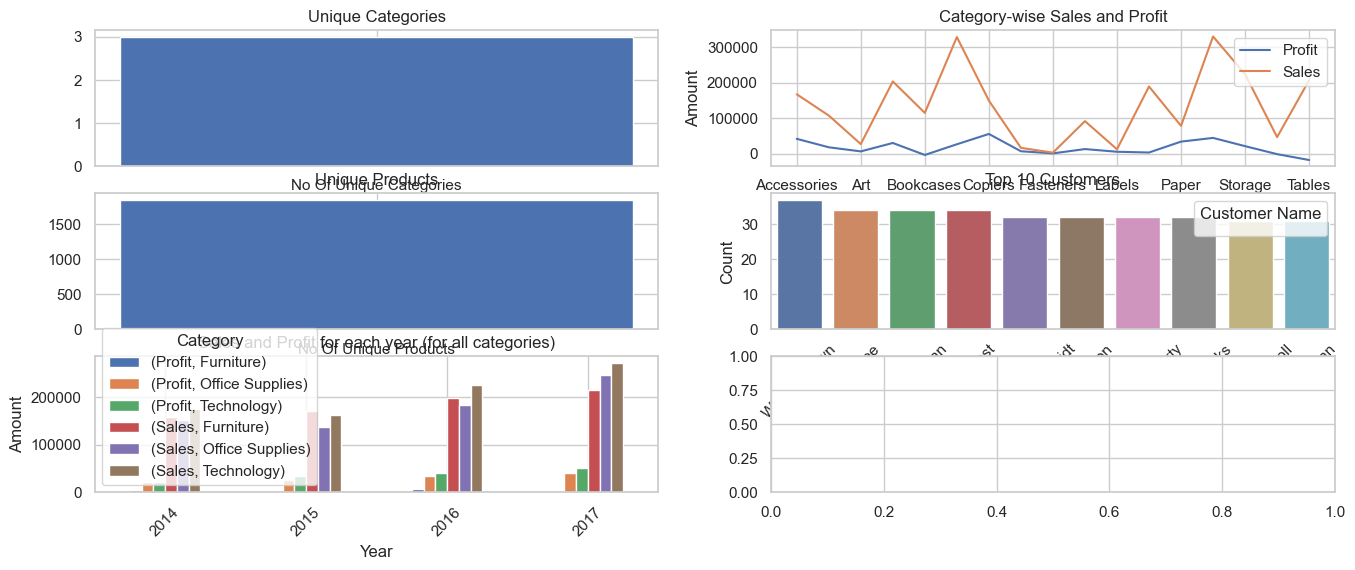

In [94]:
fig, axs = plt.subplots(3, 2, figsize=(30, 15))
Unique_Categories = list(set(Dataset["Category"]))
axs[0, 0].bar(x=["No Of Unique Categories"], height=[len(Unique_Categories)], width=0.5)
axs[0, 0].set_title("Unique Categories")
Category_wise_Sales_and_profit = Dataset.groupby("Sub-Category")[
    ["Profit", "Sales"]
].sum()
Category_wise_Sales_and_profit.plot(kind="line", ax=axs[0, 1])
axs[0, 1].set_title("Category-wise Sales and Profit")
axs[0, 1].set_xlabel("Sub-Category")
axs[0, 1].set_ylabel("Amount")
axs[0, 1].grid(True)
axs[0, 1].legend(loc="upper right")
Unique_Products = Dataset["Product Name"].unique()
No_of_Unique_Products = Dataset["Product Name"].nunique()
axs[1, 0].bar(x=["No Of Unique Products"], height=[len(Unique_Products)], width=0.5)
axs[1, 0].set_title("Unique Products")
Top_10_Customers = Dataset["Customer Name"].value_counts()
Top_10_Customers_df = pd.DataFrame(
    {"Customer Name": Top_10_Customers.index, "Count": Top_10_Customers.values}
)[:10]
sns.barplot(
    data=Top_10_Customers_df,
    x="Customer Name",
    y="Count",
    hue="Customer Name",
    ax=axs[1, 1],
)
axs[1, 1].set_title("Top 10 Customers")
axs[1, 1].set_xlabel("Customer Name")
axs[1, 1].set_ylabel("Count")
axs[1, 1].legend(title="Customer Name", loc="upper right")
axs[1, 1].tick_params(axis="x", rotation=45)
pivot_data.plot(kind="bar", ax=axs[2, 0], figsize=(16, 6), legend=True)
axs[2, 0].set_title("Sales and Profit for each year (for all categories)")
axs[2, 0].set_xlabel("Year")
axs[2, 0].set_ylabel("Amount")
axs[2, 0].legend(title="Category")
axs[2, 0].tick_params(axis="x", rotation=45)
plt.show()